![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadistica
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [184]:
import numpy as np
import pandas as pd

## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [185]:
beer = pd.read_csv("datasets_beers.csv")
display(beer.head())

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [186]:
beer.info

<bound method DataFrame.info of       Unnamed: 0    abv   ibu    id                  name  \
0              0  0.050   NaN  1436              Pub Beer   
1              1  0.066   NaN  2265           Devil's Cup   
2              2  0.071   NaN  2264   Rise of the Phoenix   
3              3  0.090   NaN  2263              Sinister   
4              4  0.075   NaN  2262         Sex and Candy   
...          ...    ...   ...   ...                   ...   
2405        2405  0.067  45.0   928             Belgorado   
2406        2406  0.052   NaN   807         Rail Yard Ale   
2407        2407  0.055   NaN   620       B3K Black Lager   
2408        2408  0.055  40.0   145   Silverback Pale Ale   
2409        2409  0.052   NaN    84  Rail Yard Ale (2009)   

                               style  brewery_id  ounces  
0                American Pale Lager         408    12.0  
1            American Pale Ale (APA)         177    12.0  
2                       American IPA         177    12.0  

In [187]:
print(beer.columns)
print(beer.ndim)

Index(['Unnamed: 0', 'abv', 'ibu', 'id', 'name', 'style', 'brewery_id',
       'ounces'],
      dtype='object')
2


## Ejercicio 3
Elimina la columna `Unnamed: 0`.

In [188]:
beer.pop('Unnamed: 0')

0          0
1          1
2          2
3          3
4          4
        ... 
2405    2405
2406    2406
2407    2407
2408    2408
2409    2409
Name: Unnamed: 0, Length: 2410, dtype: int64

In [189]:
beer.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [190]:
beer.shape

(2410, 7)

## Ejercicio 5
¿De qué tipo son los datos?

In [191]:
beer.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

## Ejercicio 6
Obtén en un nuevo DataFrame un resumen con las principales estadísticas de las columnas numéricas: mean, max, count, cuartiles...

In [192]:
ejer6 = beer.describe(exclude=object)
display(ejer6)

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [193]:
beer.groupby('style')['id'].count() # Hay un registro NaN en 'style'

style
Abbey Single Ale                2
Altbier                        13
American Adjunct Lager         18
American Amber / Red Ale      133
American Amber / Red Lager     29
                             ... 
Tripel                         11
Vienna Lager                   20
Wheat Ale                       1
Winter Warmer                  15
Witbier                        51
Name: id, Length: 99, dtype: int64

In [194]:
beer['style'].value_counts()

style
American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
                                 ... 
American Malt Liquor                1
Wheat Ale                           1
Flanders Red Ale                    1
Kristalweizen                       1
Low Alcohol Beer                    1
Name: count, Length: 99, dtype: int64

## Ejercicio 8
1. Imprime por pantalla los registros desde el décimo hasta el vigésimo
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [195]:
ejer8 = beer.iloc[9:20,:]
ejer8

,abv,ibu,id,name,style,brewery_id,ounces
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0
10,0.072,NaN,2099,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,0.073,NaN,2098,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,0.069,NaN,2097,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,0.085,NaN,1980,Troll Destroyer,Belgian IPA,177,12.0
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
15,0.060,NaN,2318,Ginja Ninja,Cider,154,12.0
16,0.060,NaN,2170,Cherried Away,Cider,154,12.0
17,0.060,NaN,2169,Rhubarbarian,Cider,154,12.0
18,0.060,NaN,1502,BrightCider,Cider,154,12.0


In [196]:
ejer8.loc[:,'name':'ounces']

,name,style,brewery_id,ounces
9,Cone Crusher,American Double / Imperial IPA,177,12.0
10,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,Troll Destroyer,Belgian IPA,177,12.0
14,Bitter Bitch,American Pale Ale (APA),177,12.0
15,Ginja Ninja,Cider,154,12.0
16,Cherried Away,Cider,154,12.0
17,Rhubarbarian,Cider,154,12.0
18,BrightCider,Cider,154,12.0


In [197]:
ejer8.loc[:, ['abv','ibu','ounces']]

,abv,ibu,ounces
9,0.086,NaN,12.0
10,0.072,NaN,12.0
11,0.073,NaN,12.0
12,0.069,NaN,12.0
13,0.085,NaN,12.0
14,0.061,60.0,12.0
15,0.060,NaN,12.0
16,0.060,NaN,12.0
17,0.060,NaN,12.0
18,0.060,NaN,12.0


In [198]:
np.array(ejer8.loc[:, ['abv','ibu','ounces']])

array([[ 0.086,    nan, 12.   ],
       [ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [199]:
beer['ounces'].sum()

32757.3

## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [200]:
beer.loc[(beer['ibu'] == 4.0) | (beer['ibu'] == 138.0)]

,abv,ibu,id,name,style,brewery_id,ounces
106,0.056,4.0,1350,Summer Solstice,Cream Ale,171,12.0
112,0.056,4.0,753,Summer Solstice Cerveza Crema (2009),Cream Ale,171,12.0
117,0.056,4.0,77,Summer Solstice (2011),Cream Ale,171,12.0
147,0.082,138.0,980,Bitter Bitch Imperial IPA,American Double / Imperial IPA,374,12.0


In [201]:
beer.set_index('name')['ibu'].max()

138.0

In [202]:
beer.set_index('name')['ibu'].min()

4.0

In [203]:
beer.set_index('name')['ibu'].mean()

#En clase beer['ibu'].mean()

42.71316725978647

## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [204]:
beer.set_index('name')['ibu'].describe()

# En clase: me piden dispersion sea varianza, desviacion estandar, rango o rango intercuartilico
# beer['ibu'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: ibu, dtype: float64

In [205]:
beer['ibu'].var() # varianza

673.6135373259929

In [206]:
beer['ibu'].median() # mediana

35.0

## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonmiento mediante un gráfico

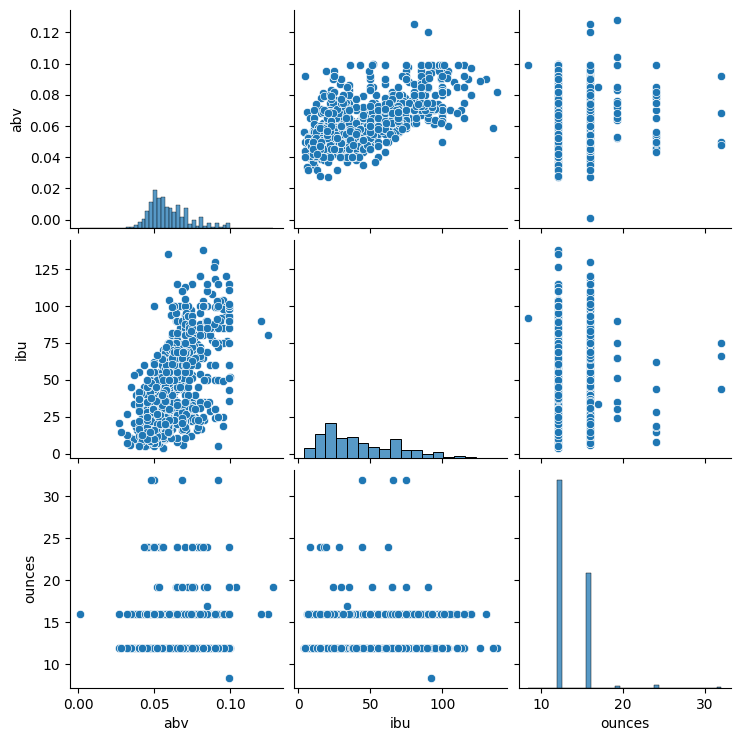

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

ejer12 = beer[['abv','ibu','ounces']]
sns.pairplot(ejer12)
plt.show()

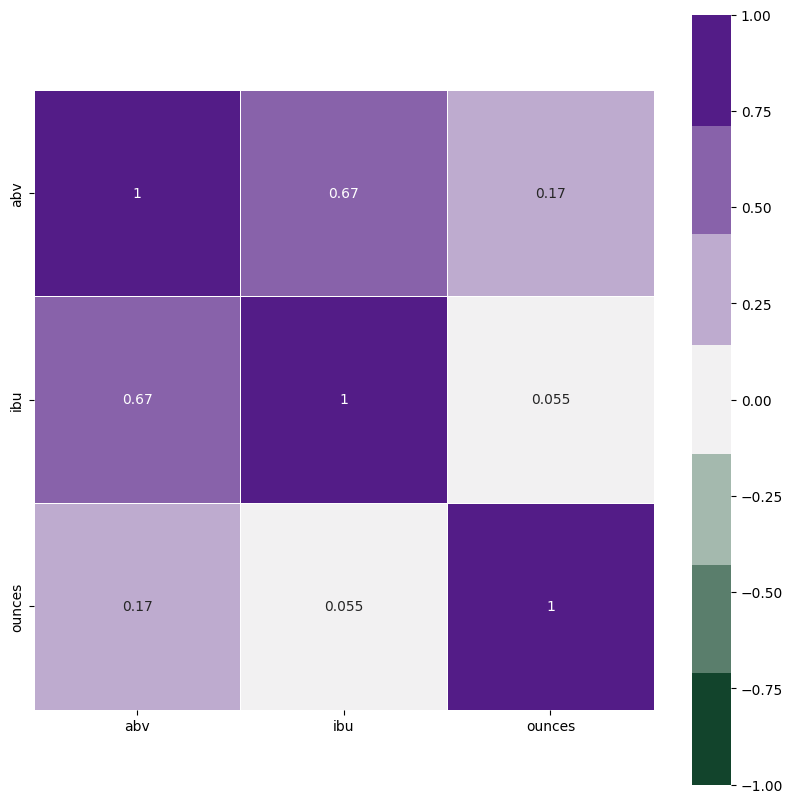

In [208]:
plt.figure(figsize=(10,10))
sns.heatmap(ejer12.corr(),vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
			# en esta linea cambio los colores, sea cambiando
            # numeros o usando nombres definidos de paletas de
            # colores
            square=True, linewidths=.5, annot=True);

## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

<Axes: ylabel='Frequency'>

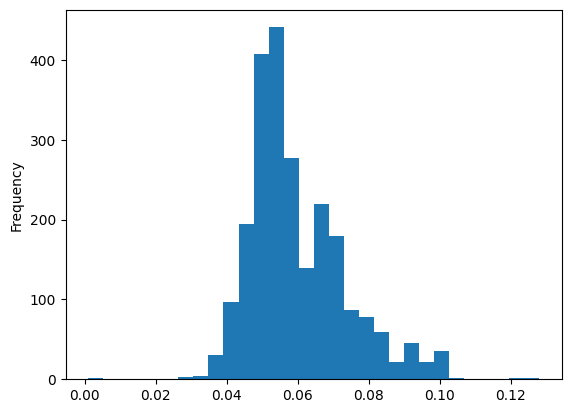

In [209]:
beer.set_index('name')['abv'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

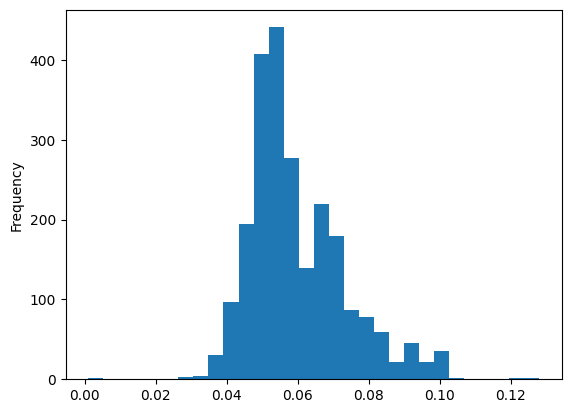

In [210]:
beer.abv.plot.hist(bins=30)

<Axes: xlabel='abv', ylabel='Count'>

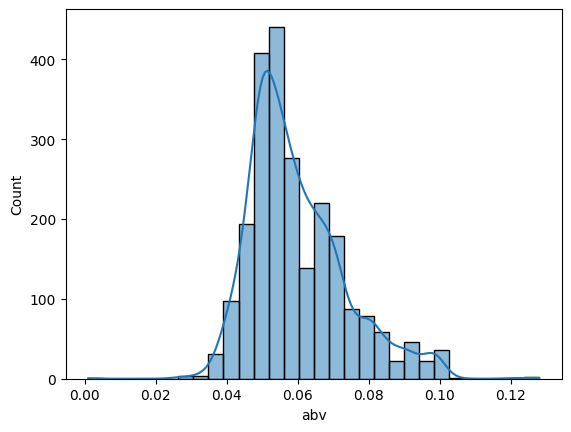

In [211]:
# En clase
sns.histplot(beer.abv, bins=30, kde=True)

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

<Axes: ylabel='abv'>

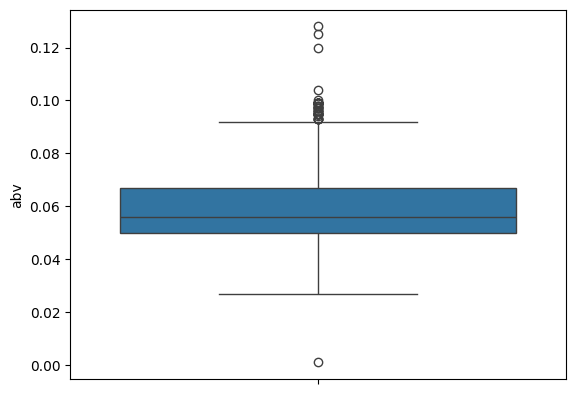

In [212]:
import seaborn as sns

sns.boxplot(beer.abv)

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [213]:
beer.groupby('style')['ibu'].mean().sort_values(ascending=False)

style
American Barleywine                   96.00
American Double / Imperial IPA        93.32
Russian Imperial Stout                86.50
American Double / Imperial Pilsner    85.00
Belgian Strong Dark Ale               72.00
                                      ...  
Kristalweizen                           NaN
Low Alcohol Beer                        NaN
Mead                                    NaN
Rauchbier                               NaN
Shandy                                  NaN
Name: ibu, Length: 99, dtype: float64

In [214]:
beer.groupby('style')['abv'].mean().sort_values(ascending=False)

style
English Barleywine        0.107667
Quadrupel (Quad)          0.104000
American Barleywine       0.099000
American Malt Liquor      0.099000
Russian Imperial Stout    0.097636
                            ...   
Berliner Weissbier        0.043909
English Dark Mild Ale     0.041500
Light Lager               0.040417
Radler                    0.040333
Low Alcohol Beer          0.001000
Name: abv, Length: 99, dtype: float64

## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

In [215]:
brew = pd.read_csv("datasets_breweries.csv")
display(brew.head())

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra tb la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

In [216]:
brew.rename(columns={'Unnamed: 0' : 'brewery_id', 'name' : 'brewery_name'}, inplace=True)
brew

,brewery_id,brewery_name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


## Ejercicio 18
Junta los dos datasets que tienes

In [217]:
new_df = pd.merge(beer,brew, on='brewery_id')
display(new_df)

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas cervecerías hay?

In [218]:
estados = len(new_df.state.unique())
ciudades = len(new_df.city.unique())
cervecerias = len(new_df.brewery_name.unique())

print(estados, ciudades, cervecerias)

51 384 551


## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

In [219]:
ejer20 = new_df.groupby(['state', 'city'])['abv'].aggregate(['mean', 'median', 'max'])

display(ejer20)

mean  median    max
state city                               
 AK   Anchorage   0.054200  0.0520  0.063
      Juneau      0.053000  0.0530  0.053
      Soldotna    0.058500  0.0580  0.068
      Talkeetna   0.059500  0.0585  0.065
 AL   Birmingham  0.065400  0.0600  0.093
...                    ...     ...    ...
 WI   Wilson      0.055000  0.0550  0.055
 WV   Lewisburg   0.062000  0.0620  0.067
 WY   Jackson     0.054857  0.0520  0.068
      Pinedale    0.061000  0.0610  0.072
      Sheridan    0.052833  0.0480  0.070

[401 rows x 3 columns]

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

In [220]:
new_df.set_index('state').loc[' IN', ['name', 'ibu']].sort_values(by='ibu', ascending=False)

,name,ibu
state,,
IN,Hopkick Dropkick,115.0
IN,Overlord Imperial IPA,115.0
IN,Half Cycle IPA,104.0
IN,Isis,91.0
IN,Csar,90.0
...,...,...
IN,The Deuce,NaN
IN,Chaka,NaN
IN,Klingon Warnog Roggen Dunkel,NaN


## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

In [221]:
new_df.groupby('city')['ibu'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Abingdon,1.0,135.000000,NaN,135.0,135.00,135.0,135.00,135.0
Abita Springs,3.0,27.333333,21.455380,13.0,15.00,17.0,34.50,52.0
Ada,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afton,4.0,43.000000,19.899749,22.0,28.00,45.0,60.00,60.0
Airway Heights,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
Woodinville,4.0,46.750000,18.643587,27.0,39.75,44.0,51.00,72.0
Worcester,1.0,69.000000,NaN,69.0,69.00,69.0,69.00,69.0
Yakima,2.0,54.000000,22.627417,38.0,46.00,54.0,62.00,70.0


## Ejercicio 23
Consigue en un DataFrame todas las cervezas en cuyas cervecerías al menos haya una cerveza con un `abv` mínimo 0.07.

In [222]:
new_df.loc[new_df['abv'] >= 0.07].brewery_name.drop_duplicates()

2              18th Street Brewery
19          21st Amendment Brewery
39             3 Daughters Brewing
52       450 North Brewing Company
60          7 Seas Brewing Company
                   ...            
2377    Wind River Brewing Company
2379               Wingman Brewers
2382     Wisconsin Brewing Company
2398        Worthy Brewing Company
2402       Wynkoop Brewing Company
Name: brewery_name, Length: 225, dtype: object

In [223]:
def  filter_func(x):
     return x.abv.mean() >= 0.07

ejer23 = pd.DataFrame(new_df.groupby('abv').filter(filter_func))

ejer23

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0,18th Street Brewery,Gary,IN
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2380,0.080,31.0,761,P-51 Porter,American Porter,509,16.0,Wingman Brewers,Tacoma,WA
2382,0.071,60.0,2148,#002 American I.P.A.,American IPA,211,12.0,Wisconsin Brewing Company,Verona,WI
2398,0.077,30.0,1513,Lights Out Vanilla Cream Extra Stout,American Double / Imperial IPA,199,12.0,Worthy Brewing Company,Bend,OR
2402,0.082,NaN,1316,Colorojo Imperial Red Ale,American Strong Ale,424,12.0,Wynkoop Brewing Company,Denver,CO


In [224]:
def  filter_func(x):
     return x.abv.mean() >= 0.07

ejer23 = pd.DataFrame(new_df.groupby('abv').filter(filter_func)['brewery_name'].unique(), columns=['brewery_name'])

ejer23

,brewery_name
0,18th Street Brewery
1,21st Amendment Brewery
2,3 Daughters Brewing
3,450 North Brewing Company
4,7 Seas Brewing Company
...,...
220,Wind River Brewing Company
221,Wingman Brewers
222,Wisconsin Brewing Company
223,Worthy Brewing Company


In [225]:
pd.merge(new_df, ejer23)

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
1,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
2,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
1480,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
1481,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
1482,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
1483,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [226]:
media = new_df['ibu'].mean()
media

42.71316725978647

In [227]:
ejer24 = new_df.groupby('state')['ibu'].aggregate(['mean'])

ejer24 = ejer24.loc[ejer24['mean'] > media]

ejer24

,mean
state,
AL,51.222222
CA,46.281481
CO,47.431507
DC,55.250000
DE,52.000000
FL,46.756757
GA,46.285714
ID,55.117647
IN,42.989011


In [228]:
ejer242 = pd.merge(new_df,ejer24, on='state')

ejer242

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state,mean
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR,47.942529
1,0.060,NaN,2318,Ginja Ninja,Cider,154,12.0,2 Towns Ciderhouse,Corvallis,OR,47.942529
2,0.060,NaN,2170,Cherried Away,Cider,154,12.0,2 Towns Ciderhouse,Corvallis,OR,47.942529
3,0.060,NaN,2169,Rhubarbarian,Cider,154,12.0,2 Towns Ciderhouse,Corvallis,OR,47.942529
4,0.060,NaN,1502,BrightCider,Cider,154,12.0,2 Towns Ciderhouse,Corvallis,OR,47.942529
...,...,...,...,...,...,...,...,...,...,...,...
1283,0.050,NaN,2572,Hop Session,American IPA,47,12.0,White Birch Brewing,Hooksett,NH,48.500000
1284,0.055,NaN,2571,Blueberry Berliner Weisse,Berliner Weissbier,47,12.0,White Birch Brewing,Hooksett,NH,48.500000
1285,0.055,NaN,2570,Berliner Weisse,Berliner Weissbier,47,12.0,White Birch Brewing,Hooksett,NH,48.500000
1286,0.065,82.0,2417,4000 Footer IPA,American IPA,109,12.0,"Woodstock Inn, Station & Brewery",North Woodstock,NH,48.500000
